In [1]:
pip install pandas_datareader

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.express as px
import streamlit as st
import requests
from streamlit_lottie import st_lottie

In [3]:
from datetime import date
from datetime import timedelta
today = date.today()
print("Today is: ", today)
 
# Yesterday date
yesterday = today - timedelta(days = 1)
print("Yesterday was: ", yesterday)

Today is:  2022-01-08
Yesterday was:  2022-01-07


In [4]:
start='2008-01-01'
end=yesterday;

df=data.DataReader('AAPL','yahoo',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.065246
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.966034
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.968793
2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.513163
2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.439369
...,...,...,...,...,...,...
2022-01-03,182.880005,177.710007,177.830002,182.009995,1.044879e+08,182.009995
2022-01-04,182.940002,179.119995,182.630005,179.699997,9.931040e+07,179.699997
2022-01-05,180.169998,174.639999,179.610001,174.919998,9.453760e+07,174.919998


In [5]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.065246
1,2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.966034
2,2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.968793
3,2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.513163
4,2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.439369


In [6]:
date=df['Date']
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09
2,7.049643,6.881786,6.978929,6.961786,8.420664e+08
3,6.892857,6.388929,6.837500,6.430357,1.455832e+09
4,6.557143,6.079643,6.473214,6.344286,2.072193e+09


In [7]:
average100=df['Close'].rolling(100).mean()
average100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3527    155.0014
3528    155.3095
3529    155.5677
3530    155.7765
3531    155.9963
Name: Close, Length: 3532, dtype: float64

In [8]:
average30=df['Close'].rolling(100).mean()
#average365=df['Close'].rolling(365).mean()
#average30

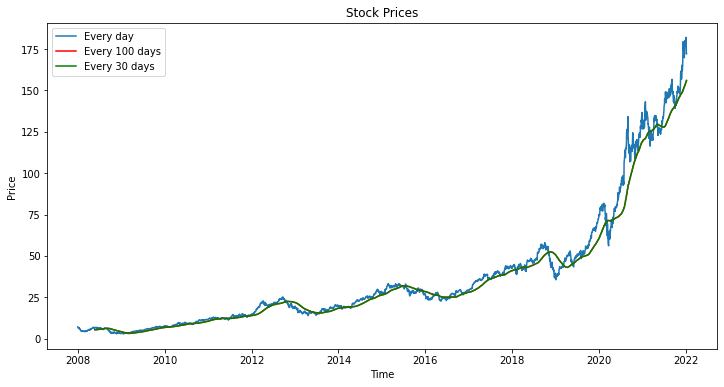

In [9]:
plt.figure(figsize=(12,6))
plt.plot(date,df['Close'],label="Every day")
plt.plot(date,average100,color='red',label="Every 100 days")
plt.plot(date,average30,color='green',label="Every 30 days")
#plt.plot(average365,color='pink',label="Every year")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [10]:
df.shape

(3532, 5)

In [11]:
#Splitting data into training and testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
ydate= date[int(len(df)*0.7):int(len(df))]
print(data_training.shape)
print(data_testing.shape)

(2472, 1)
(1060, 1)


In [12]:
data_training.head()

,Close
0,7.074286
1,6.958571
2,6.961786
3,6.430357
4,6.344286


In [13]:
pip install sklearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
dataset_train = scaler.fit_transform(data_training)
dataset_test = scaler.transform(data_testing)

In [16]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [17]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
#ML MODEL

In [20]:
pip install keras

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install tensorflow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [32]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
76/76 [==============================] - 15s 123ms/step - loss: 0.0162
Epoch 2/50
76/76 [==============================] - 10s 129ms/step - loss: 0.0026
Epoch 3/50
76/76 [==============================] - 10s 136ms/step - loss: 0.0020
Epoch 4/50
76/76 [==============================] - 11s 144ms/step - loss: 0.0022
Epoch 5/50
76/76 [==============================] - 11s 141ms/step - loss: 0.0019
Epoch 6/50
76/76 [==============================] - 11s 145ms/step - loss: 0.0021
Epoch 7/50
76/76 [==============================] - 11s 144ms/step - loss: 0.0021
Epoch 8/50
76/76 [==============================] - 11s 150ms/step - loss: 0.0017
Epoch 9/50
76/76 [==============================] - 11s 147ms/step - loss: 0.0016
Epoch 10/50
76/76 [==============================] - 11s 146ms/step - loss: 0.0021
Epoch 11/50
76/76 [==============================] - 11s 148ms/step - loss: 0.0019
Epoch 12/50
76/76 [==============================] - 11s 150ms/step - loss: 0.0016
Epoch 13/50
7

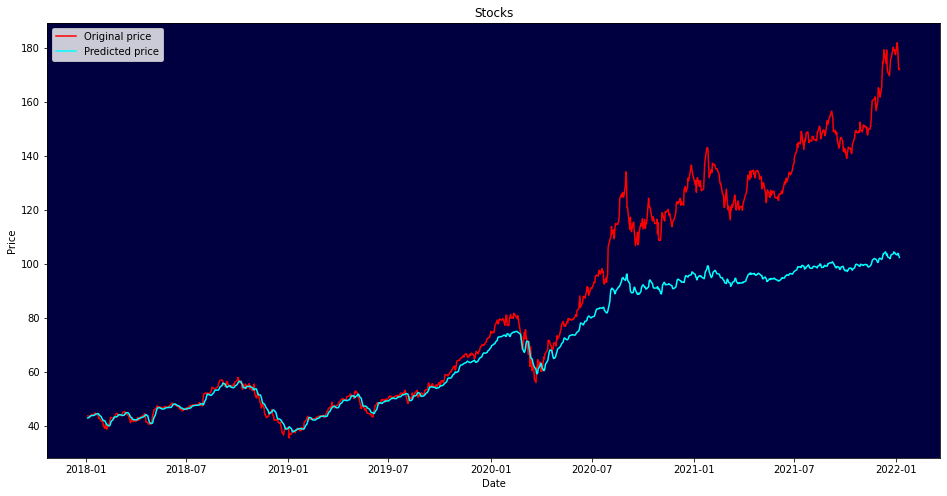

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

cydate=ydate[50:]
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(cydate,y_test_scaled, color='red', label='Original price')
plt.plot(cydate,predictions, color='cyan', label='Predicted price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stocks")
plt.legend()